# Hierarchical Clustering (MPG Data)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn. metrics import silhouette_score

import scipy.cluster.hierarchy as sch

In [2]:
df= pd.read_csv("cluster_mpg.csv")

In [3]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    object 
 8   name          392 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 27.7+ KB


In [5]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [6]:
df["name"].nunique()

301

In [7]:
# we can drop "name":

df = df.drop("name", axis= 1)

In [8]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,usa
1,15.0,8,350.0,165.0,3693,11.5,70,usa
2,18.0,8,318.0,150.0,3436,11.0,70,usa
3,16.0,8,304.0,150.0,3433,12.0,70,usa
4,17.0,8,302.0,140.0,3449,10.5,70,usa


In [9]:
df["model_year"].value_counts()

73    40
78    36
76    34
75    30
82    30
70    29
79    29
72    28
77    28
81    28
71    27
80    27
74    26
Name: model_year, dtype: int64

In [10]:
# We can Convert "model_year" to age of car:

df["age"] = 122 - df["model_year"]

In [11]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,age
0,18.0,8,307.0,130.0,3504,12.0,70,usa,52
1,15.0,8,350.0,165.0,3693,11.5,70,usa,52
2,18.0,8,318.0,150.0,3436,11.0,70,usa,52
3,16.0,8,304.0,150.0,3433,12.0,70,usa,52
4,17.0,8,302.0,140.0,3449,10.5,70,usa,52


In [12]:
df= df.drop("model_year", axis= 1)

In [13]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,origin,age
0,18.0,8,307.0,130.0,3504,12.0,usa,52
1,15.0,8,350.0,165.0,3693,11.5,usa,52
2,18.0,8,318.0,150.0,3436,11.0,usa,52
3,16.0,8,304.0,150.0,3433,12.0,usa,52
4,17.0,8,302.0,140.0,3449,10.5,usa,52


In [14]:
for col in df.columns:
    print(col)
    print(df[col].nunique())

mpg
127
cylinders
5
displacement
81
horsepower
93
weight
346
acceleration
95
origin
3
age
13


In [15]:
# We need to get dummies for "origin":

x = pd.get_dummies(df)

In [16]:
x.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,age,origin_europe,origin_japan,origin_usa
0,18.0,8,307.0,130.0,3504,12.0,52,0,0,1
1,15.0,8,350.0,165.0,3693,11.5,52,0,0,1
2,18.0,8,318.0,150.0,3436,11.0,52,0,0,1
3,16.0,8,304.0,150.0,3433,12.0,52,0,0,1
4,17.0,8,302.0,140.0,3449,10.5,52,0,0,1


In [17]:
x.shape

(392, 10)

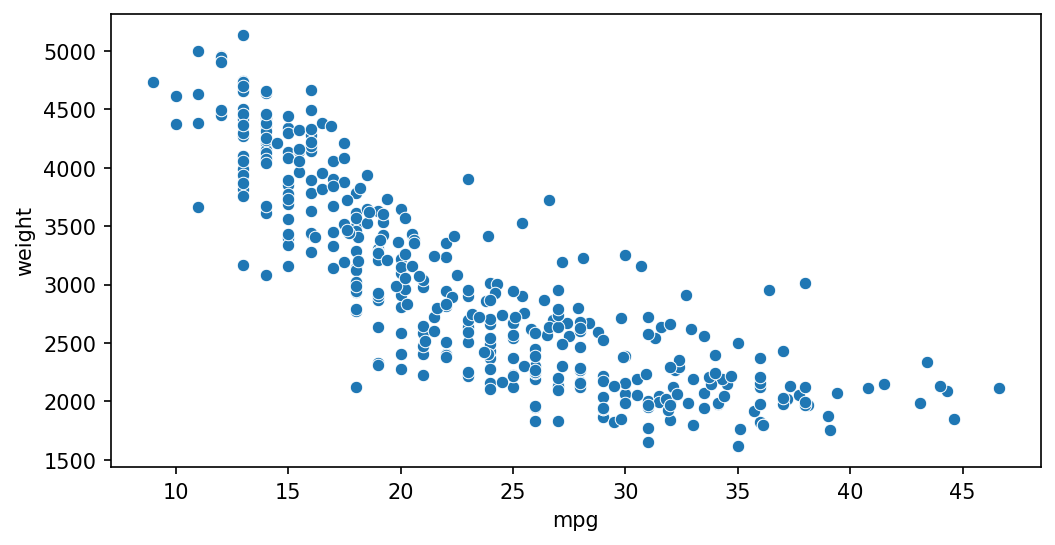

In [19]:
plt.figure(figsize= (8,4), dpi= 150)
sns.scatterplot(data= df, x= "mpg", y="weight")
plt.show()

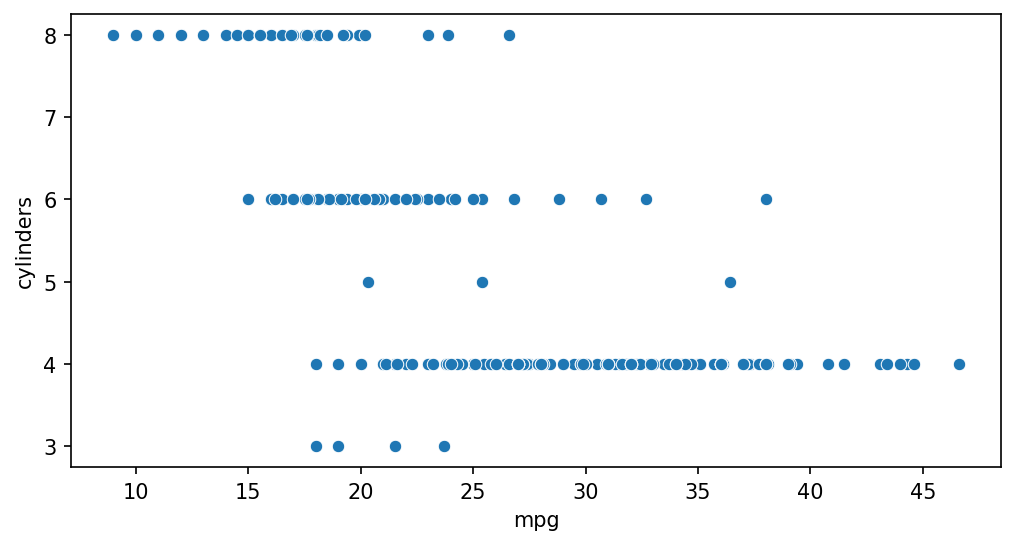

In [20]:
plt.figure(figsize= (8,4), dpi= 150)
sns.scatterplot(data= df, x= "mpg", y="cylinders")
plt.show()

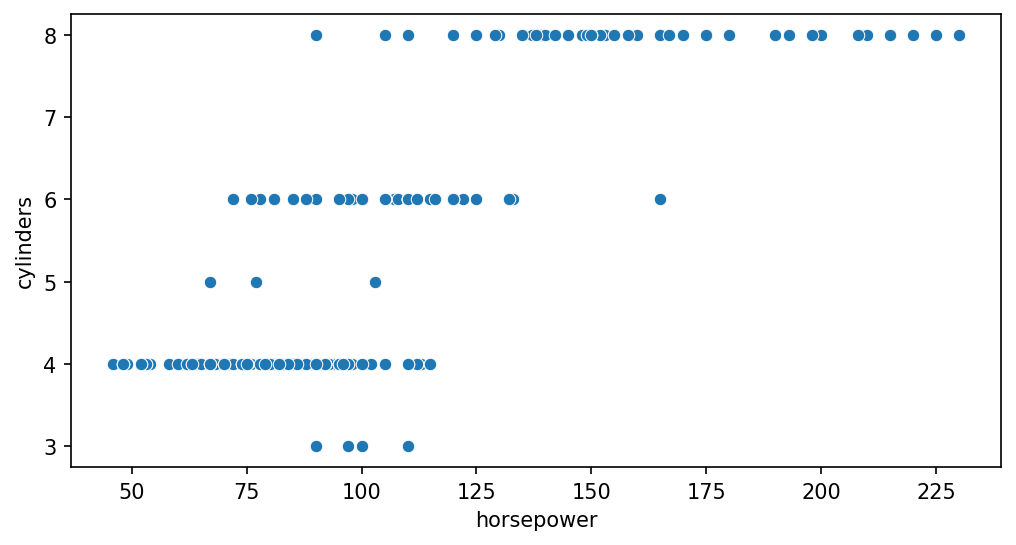

In [21]:
plt.figure(figsize= (8,4), dpi= 150)
sns.scatterplot(data= df, x= "horsepower", y="cylinders")
plt.show()

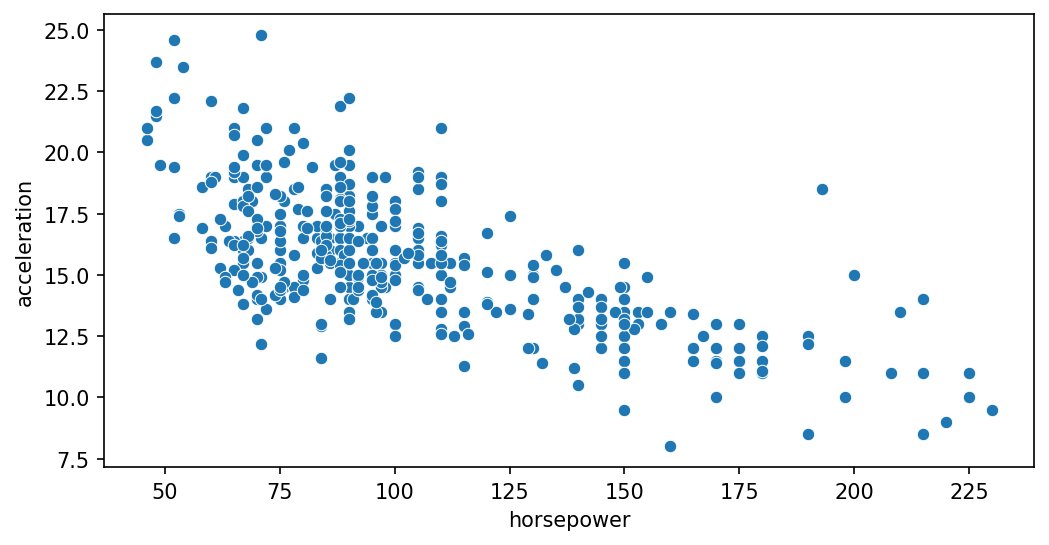

In [22]:
plt.figure(figsize= (8,4), dpi= 150)
sns.scatterplot(data= df, x= "horsepower", y="acceleration")
plt.show()

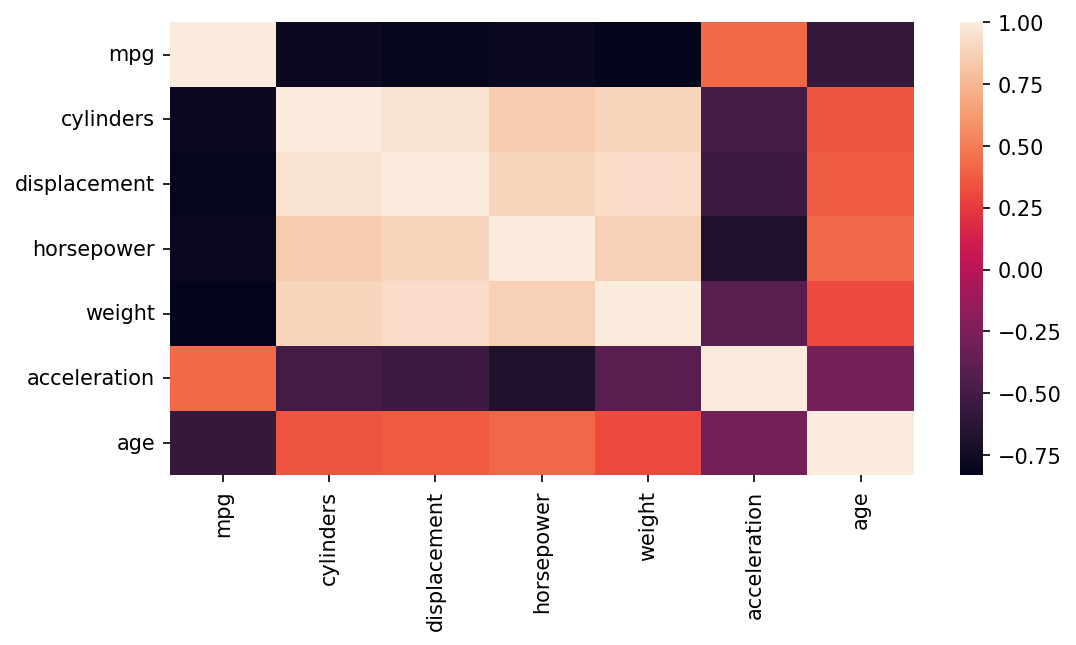

In [25]:
plt.figure(figsize= (8,4), dpi= 150)
sns.heatmap(data= df.corr())
plt.show()

### Scalling:

In [29]:
mn = MinMaxScaler()

In [30]:
temp = mn.fit_transform(x)
x = pd.DataFrame(temp, columns= x.columns)
x.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,age,origin_europe,origin_japan,origin_usa
0,0.239362,1.0,0.617571,0.456522,0.536150,0.238095,1.0,0.0,0.0,1.0
1,0.159574,1.0,0.728682,0.646739,0.589736,0.208333,1.0,0.0,0.0,1.0
2,0.239362,1.0,0.645995,0.565217,0.516870,0.178571,1.0,0.0,0.0,1.0
3,0.186170,1.0,0.609819,0.565217,0.516019,0.238095,1.0,0.0,0.0,1.0
4,0.212766,1.0,0.604651,0.510870,0.520556,0.148810,1.0,0.0,0.0,1.0


<Figure size 1200x600 with 0 Axes>

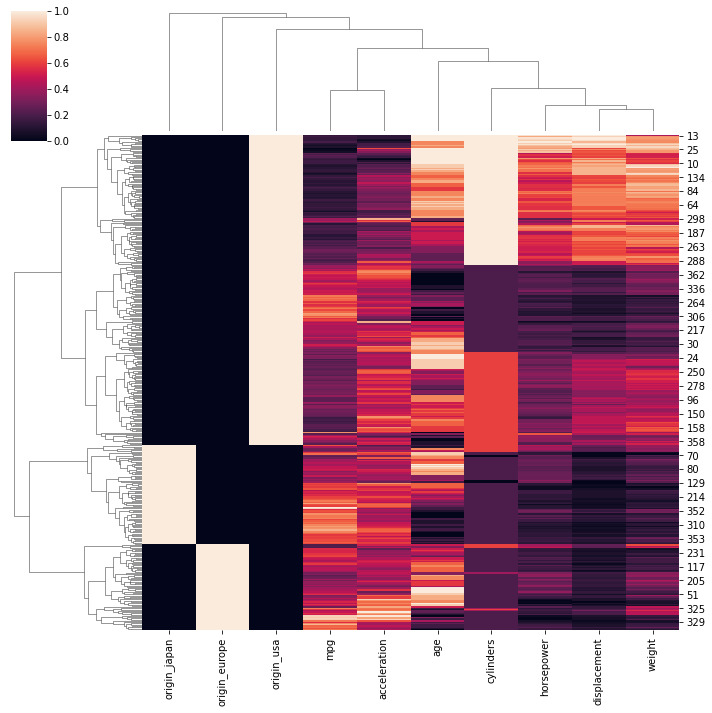

In [31]:
# Hierarchical Clustering Using Seaborn:

plt.figure(figsize= (8,4), dpi= 150)
sns.clustermap(data= x)
plt.show()

### Finding Optimal Number of Clusters:

In [33]:
sil_score= []

for k in range(2,26):
    
    hrc = AgglomerativeClustering(n_clusters= k)
    
    clusters = hrc.fit_predict(x)
    
    sil_score.append(silhouette_score(x, clusters))

In [34]:
sil_score

[0.47745879403803587,
 0.5654412305864406,
 0.5358884127590797,
 0.49378581815869443,
 0.4749366346005741,
 0.410587616145896,
 0.40618698214871785,
 0.3629830009709472,
 0.3598137176599912,
 0.3638008097105436,
 0.35057704949570523,
 0.35016407595621746,
 0.3370285181956753,
 0.33996573851033407,
 0.3291312045133952,
 0.32081687606150194,
 0.30536341637030334,
 0.2995078001605521,
 0.2889736980059113,
 0.29568860779580575,
 0.29719600106550653,
 0.2921754586156901,
 0.289495416691714,
 0.2951584311979596]

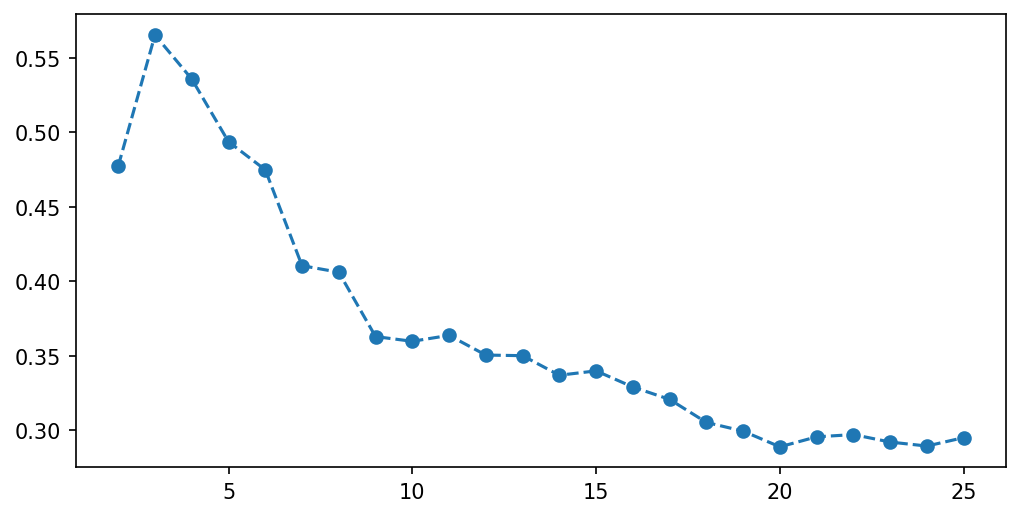

In [36]:
plt.figure(figsize= (8,4), dpi= 150)
plt.plot(range(2,26), sil_score, "o--")
plt.show()

In [37]:
# 3 Clusters are best option.

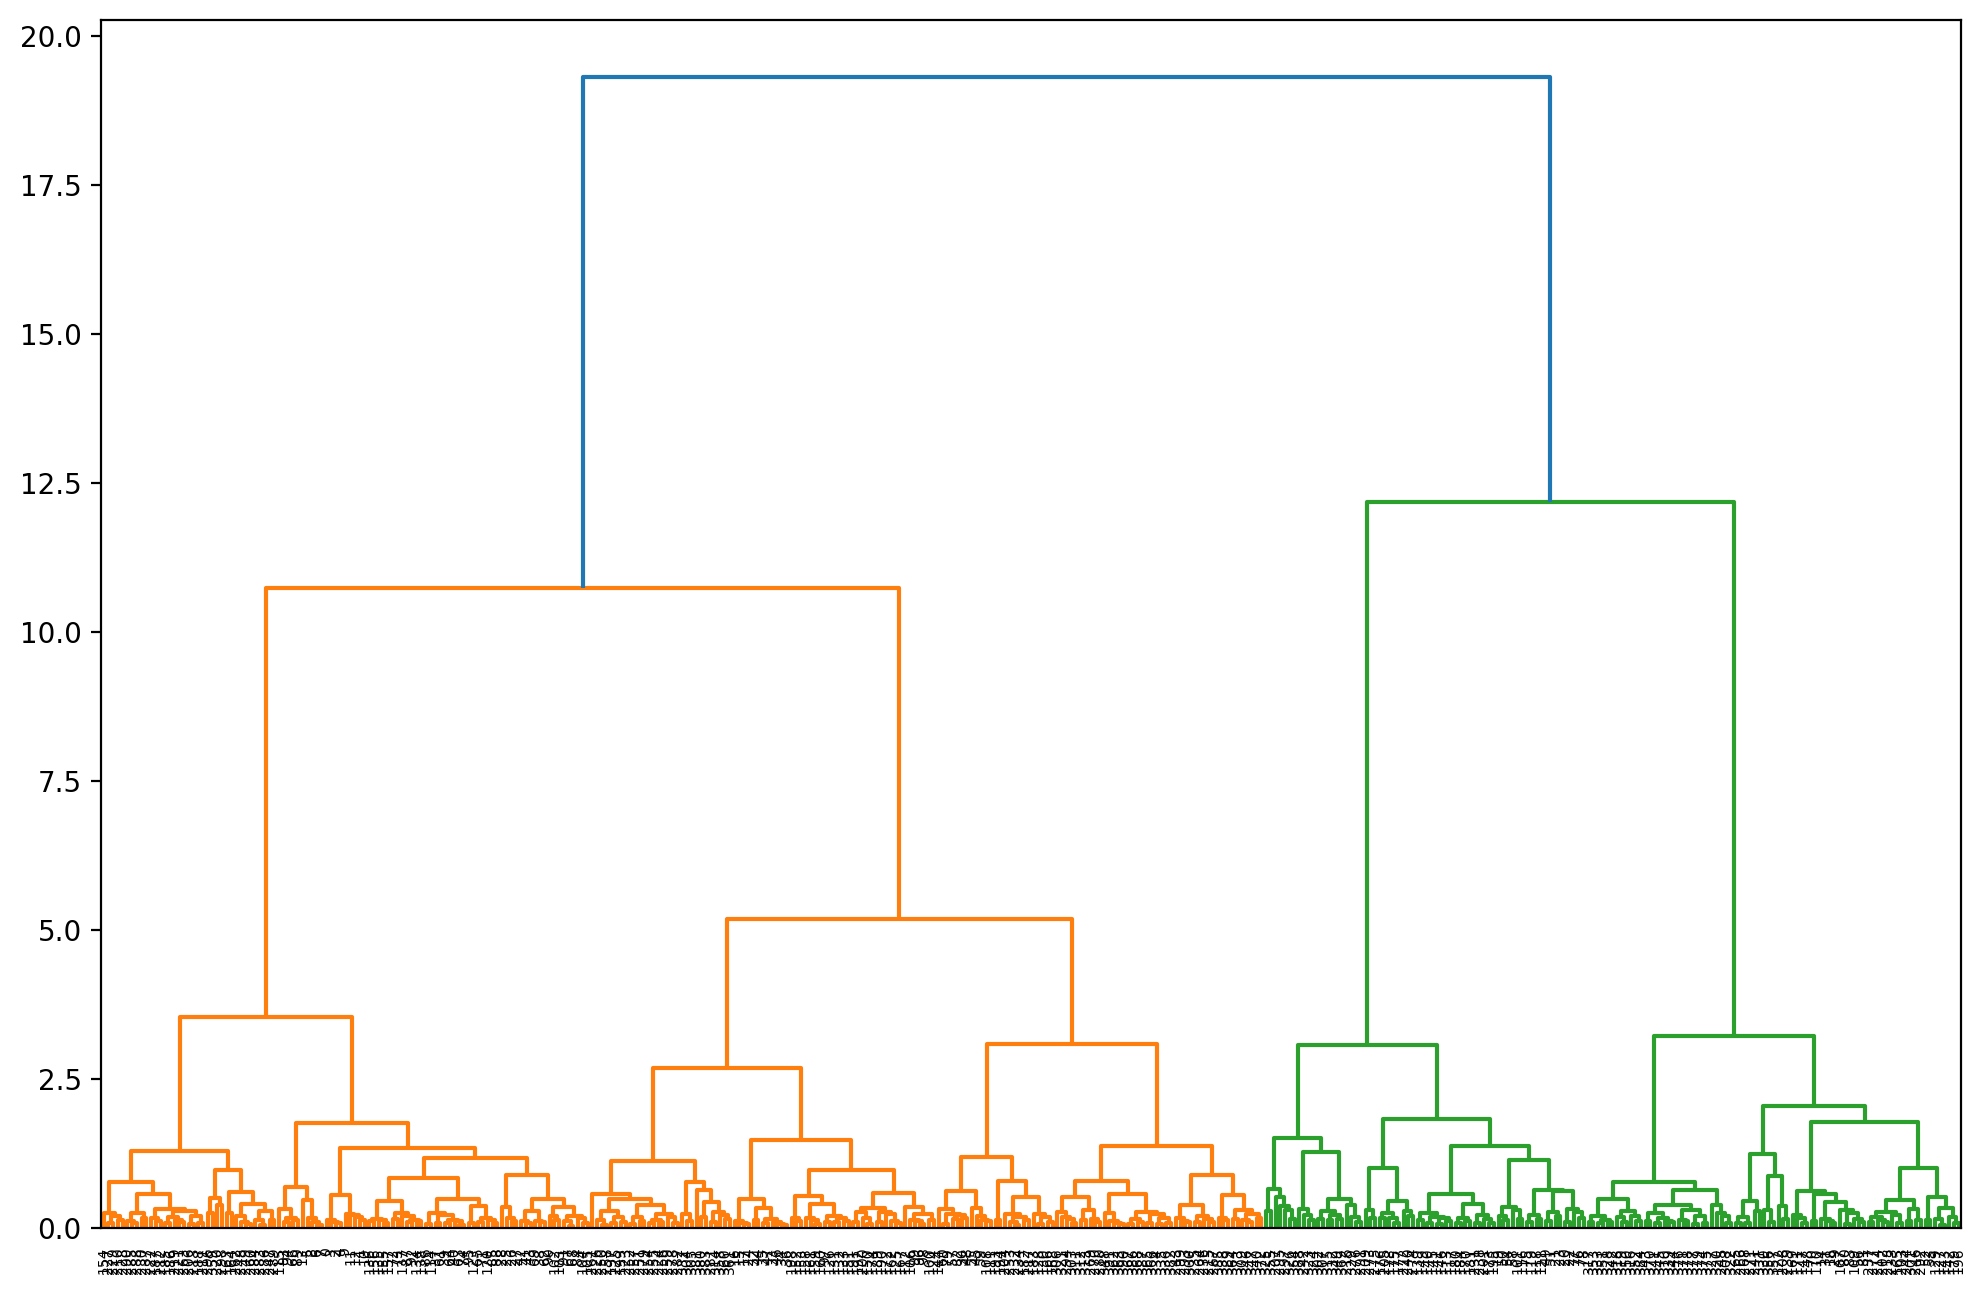

In [39]:
plt.figure(figsize= (12,8), dpi= 200)
dendrogram = sch.dendrogram(sch.linkage(x, method= "ward"))
plt.show()